# IP threat vector hacking

## Preparation
Load libraries and data

In [1]:
import pickle
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pickle.load(open("vector.IPS", "rb"))

## Columns
Prepare by constructing lists containing names of apility, facebook and VirusTotal columns to bse used later.

In [3]:
# Construct lists of column names
apility_cols = [v for v in df.columns if v.startswith("apility.")]
facebook_cols = [v for v in df.columns if v.startswith("facebook.")]
vt_cols = [v for v in df.columns if v.startswith("vt.")]

In [4]:
# Create scores by summing the columns.
df["apility"] = df[apility_cols].sum(axis=1)
df["facebook"] = df[facebook_cols].sum(axis=1)
df["vt"] = df[vt_cols].sum(axis=1)

## Aggregating

In [5]:
# Probability aggregation function
prob_agg = lambda a: 1.0 - np.prod([1.0 - v for v in a])

### All columns

In [6]:
dfs = df[apility_cols + facebook_cols + vt_cols]
dfs = dfs.copy()
dfs["score"] = dfs.apply(prob_agg, axis=1)

In [7]:
df_dev = dfs[dfs["score"] > 0.0][["score"]].groupby("device").apply(lambda x: prob_agg(x.values)).to_frame()
df_dev.columns = ["score"]
df_dev.sort_values(by="score", ascending=False)

,score
device,
DESKTOP-PIMD8C0,1.000000
LAPTOP-1I501C4U,1.000000
dramatic-mac,1.000000
dgmac,1.000000
MalcomWare-PC,0.999999
terrestrial-mac,0.999969
misskitty-mac,0.999918
steamverne-mac,0.999547
boundless-mac,0.999547


In [8]:
df_dom = dfs[dfs["score"] > 0.0][["score"]].groupby("ip").apply(lambda x: prob_agg(x.values)).to_frame()
df_dom.columns = ["score"]
df_dom.sort_values(by="score", ascending=False)

,score
ip,
216.239.32.21,0.999016
108.177.112.132,0.998525
108.177.112.94,0.995019
74.125.132.132,0.991250
74.125.124.94,0.989838
198.185.159.144,0.987733
8.8.8.8,0.982953
69.16.175.42,0.982276
74.125.132.101,0.964183


### Apility

In [9]:
dfs = df[apility_cols]
dfs = dfs.copy()
dfs["score"] = dfs.apply(prob_agg, axis=1)

In [10]:
df_dev = dfs[dfs["score"] > 0.0][["score"]].groupby("device").apply(lambda x: prob_agg(x.values)).to_frame()
df_dev.columns = ["score"]
df_dev.sort_values(by="score", ascending=False)

,score
device,
dramatic-mac,0.996030
misskitty-mac,0.948713
tirasse-mac,0.943994
boundless-mac,0.571182
minesweepers-mac,0.477319
terrestrial-mac,0.360350
essential-cb,0.328731
elysium-mac,0.274786
simon-macpro,0.181283


### Facebook

In [11]:
dfs = df[facebook_cols]
dfs = dfs.copy()
dfs["score"] = dfs.apply(prob_agg, axis=1)

In [12]:
df_dev = dfs[dfs["score"] > 0.0][["score"]].groupby("device").apply(lambda x: prob_agg(x.values)).to_frame()
df_dev.columns = ["score"]
df_dev.sort_values(by="score", ascending=False)

,score
device,
dramatic-mac,0.852578
boundless-mac,0.687973
terrestrial-mac,0.636831
minesweepers-mac,0.570658
serotinal-mac,0.515471
steamverne-mac,0.455347
nervings-cb,0.439974
elysium-mac,0.420447
languid-mac,0.299532


### VirusTotal

In [13]:
dfs = df[vt_cols]
dfs = dfs.copy()
dfs["score"] = dfs.apply(prob_agg, axis=1)

In [14]:
df_dev = dfs[dfs["score"] > 0.0][["score"]].groupby("device").apply(lambda x: prob_agg(x.values)).to_frame()
df_dev.columns = ["score"]
df_dev.sort_values(by="score", ascending=False)

,score
device,
DESKTOP-PIMD8C0,1.000000
LAPTOP-1I501C4U,1.000000
dgmac,1.000000
MalcomWare-PC,0.999999
dramatic-mac,0.999960
terrestrial-mac,0.999866
steamverne-mac,0.999017
elysium-mac,0.998726
misskitty-mac,0.997722


### Bar chart

In [15]:
dfs = df.copy()
dfs["apility score"] = dfs[apility_cols].apply(prob_agg, axis=1)
dfs["facebook score"] = dfs[facebook_cols].apply(prob_agg, axis=1)
dfs["vt score"] = dfs[vt_cols].apply(prob_agg, axis=1)

In [16]:
grouped = dfs[["apility score", "facebook score", "vt score"]].groupby("device")
agg = grouped.agg(
    {
        "apility score": prob_agg, "facebook score": prob_agg, "vt score": prob_agg
    }
)
agg["score"] = agg["apility score"] + agg["facebook score"] + agg["vt score"]
agg

,apility score,facebook score,vt score,score
device,,,,
08:02:8e:9f:13:0a,0.000000,0.000000,0.000000,0.000000
DESKTOP-PIMD8C0,0.087557,0.143759,1.000000,1.231316
LAPTOP-1I501C4U,0.087557,0.143759,1.000000,1.231316
MalcomWare-PC,0.087557,0.011501,0.999999,1.099057
abroad-android,0.000000,0.017124,0.253182,0.270305
boundless-mac,0.571182,0.687973,0.996615,2.255770
calcannea-cb,0.046101,0.181210,0.973762,1.201073
calcannea-mac,0.000000,0.054041,0.578053,0.632095
castle3b7c9f,0.022423,0.000000,0.135342,0.157764


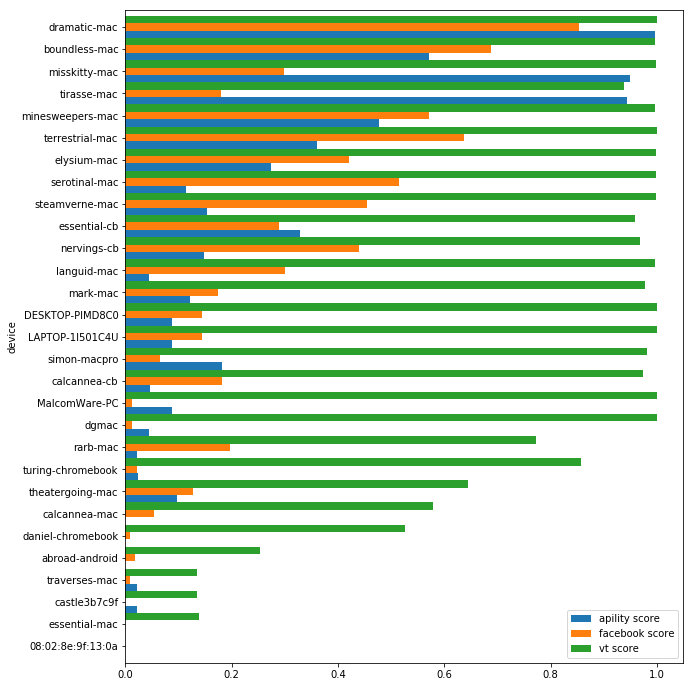

In [17]:
plt.figure()
agg = agg.sort_values("score", ascending=True)
agg[["apility score", "facebook score", "vt score"]].plot(kind="barh", figsize=(10, 12), width=1, fontsize=10)
plt.show()

Here, more of a correlation between Apility and Facebook. VirusTotal thinks everyone's IP access is dodgy.